Human Face Emotions,
This dataset contains three folders namely Happy, Sad and Angry. Each folder contains around 100 images of each mentioned expression.

Libraries we need:  

In [1]:
import os
import cv2
import pickle
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


We need to change the images file format:

کد cnn

In [2]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # First Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)  # Grayscale images
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        # Fully Connected Layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Adjust based on input image size
        self.fc2 = nn.Linear(128, 10)  # Output 10 classes, e.g., for MNIST

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the output from convolution layers
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleCNN()


In [3]:
# مسیر به دیتاست
dataset_dir = r'data/'  # مسیر اصلی دیتاست

# اندازه تصویر
img_size = 150

# لیست‌ها برای ذخیره تصاویر و برچسب‌ها
images = []
labels = []

# لیستی از احساسات
emotion_labels = {
    'Happy': 0, 'Sad': 1, 'Angry': 2
}

# بارگذاری تصاویر و برچسب‌ها از پوشه‌های مختلف
for emotion, label in emotion_labels.items():
    emotion_folder = os.path.join(dataset_dir, emotion)
    
    # بررسی اینکه پوشه وجود دارد
    if os.path.exists(emotion_folder):
        print(f"Folder exists: {emotion_folder}")
        for img_name in os.listdir(emotion_folder):
            img_path = os.path.join(emotion_folder, img_name)
            
            # چاپ مسیر فایل برای بررسی
            print(f"Reading image: {img_path}")
            
            # بارگذاری تصویر
            img = cv2.imread(img_path)
            
            # بررسی اگر تصویر بارگذاری نشد
            if img is None:
                print(f"Warning: Image {img_path} could not be loaded.")
                continue  # ادامه می‌دهیم بدون اینکه به آن تصویر پرداخته شود

            # تغییر اندازه و نرمال‌سازی
            img = cv2.resize(img, (150, 150))  # تغییر اندازه به 150x150
            img = img / 255.0  # نرمال‌سازی تصویر
            
            # افزودن تصویر و برچسب به لیست
            images.append(img)
            labels.append(label)
    else:
        print(f"Warning: The folder {emotion_folder} does not exist.")

# تبدیل لیست‌ها به آرایه NumPy
images = np.array(images)
labels = np.array(labels)

# تبدیل برچسب‌ها به فرمت one-hot
labels = to_categorical(labels, num_classes=3)

# ذخیره به فرمت pkl
with open('emotion_dataset.pkl', 'wb') as f:
    pickle.dump((images, labels), f)



NameError: name 'to_categorical' is not defined

Number of each images in data

In [ ]:
for emotion in emotion_labels.keys():
    emotion_folder = os.path.join(dataset_dir, emotion)
    files = os.listdir(emotion_folder)
    print(f"Number of images in {emotion_folder}: {len(files)}")


Number of images in data/Happy: 100
Number of images in data/Sad: 79
Number of images in data/Angry: 86


Images shape and Labels shape
#train

In [ ]:
# بارگذاری داده‌ها از فایل pkl
with open('emotion_dataset.pkl', 'rb') as f:
    train_images, train_labels = pickle.load(f)

# بررسی ابعاد داده‌ها
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)


Train images shape: (264, 150, 150, 3)
Train labels shape: (264, 3)


CNN Model

In [ ]:
# ساخت مدل CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 کلاس: angry,happy,sad
])

# کامپایل کردن مدل
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# آموزش مدل
model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 491ms/step - accuracy: 0.3886 - loss: 2.0766 - val_accuracy: 0.1887 - val_loss: 1.1419
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.4590 - loss: 1.0632 - val_accuracy: 0.0000e+00 - val_loss: 1.3421
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - accuracy: 0.6139 - loss: 0.9817 - val_accuracy: 0.0000e+00 - val_loss: 3.1195
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.6134 - loss: 0.9313 - val_accuracy: 0.0000e+00 - val_loss: 1.7490
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.6699 - loss: 0.7901 - val_accuracy: 0.0000e+00 - val_loss: 1.5031
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.6445 - loss: 0.8372 - val_accuracy: 0.0000e+00 - val_loss: 2.5650
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.7474 - loss: 0.6225 - val_accuracy: 0.0566 - val_loss: 1.8474
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.8254 - loss: 0.4947 - val_accurac

In [ ]:

# تقسیم داده‌ها به آموزش و اعتبارسنجی (80% آموزش، 20% اعتبارسنجی)
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(val_images, val_labels))
#print("Train images shape:", train_images.shape)
#print("Train labels shape:", train_labels.shape)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - accuracy: 0.7376 - loss: 0.9155 - val_accuracy: 0.7925 - val_loss: 0.5400
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.7995 - loss: 0.5036 - val_accuracy: 0.8302 - val_loss: 0.4294
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.8559 - loss: 0.4155 - val_accuracy: 0.8302 - val_loss: 0.3826
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.9018 - loss: 0.2533 - val_accuracy: 0.8868 - val_loss: 0.3665
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.9433 - loss: 0.1514 - val_accuracy: 0.8302 - val_loss: 0.4193
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.9625 - loss: 0.1143 - val_accuracy: 0.8868 - val_loss: 0.3597
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.9804 - loss: 0.0682 - val_accuracy: 0.8679 - val_loss: 0.4525
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.9982 - loss: 0.0373 - val_accuracy: 0.8868 - val_loss:

Training and Assessment Results

In [ ]:
loss, accuracy = model.evaluate(val_images, val_labels)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8013 - loss: 0.5790
Validation Accuracy: 81.13%


Save model

In [ ]:
model.save('emotion_model.h5')


Plot

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.9856 - loss: 0.0510 - val_accuracy: 0.7925 - val_loss: 0.8402
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - accuracy: 0.9982 - loss: 0.0248 - val_accuracy: 0.8302 - val_loss: 0.8172
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 1.0000 - loss: 0.0183 - val_accuracy: 0.8113 - val_loss: 0.7597
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.9869 - loss: 0.0239 - val_accuracy: 0.7925 - val_loss: 0.7447
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 0.7358 - val_loss: 0.8468
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 1.0000 - loss: 0.0242 - val_accuracy: 0.7547 - val_loss: 1.0619
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.9784 - loss: 0.0428 - val_accuracy: 0.7925 - val_loss: 0.6806
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.9824 - loss: 0.0455 - val_accuracy: 0.7358 - val_loss:

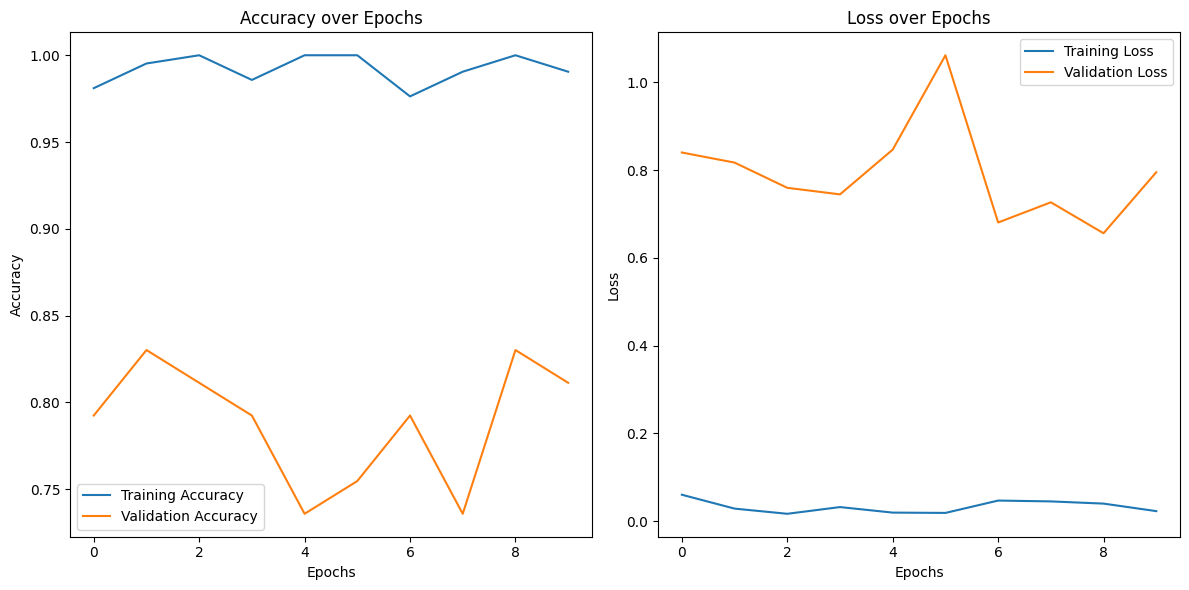

In [ ]:

# رسم نمودار دقت
plt.figure(figsize=(12, 6))

# دقت آموزش و اعتبارسنجی
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# رسم نمودار از دست دادن
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# نمایش نمودارها
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(val_images, val_labels), callbacks=[early_stopping])


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.7925 - val_loss: 0.8385
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.7736 - val_loss: 1.0216
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 0.7736 - val_loss: 1.0706
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 0.7925 - val_loss: 0.9108
